In [1]:
# Verify installation
import google.cloud.bigquery
import pandas as pd
print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


In [2]:
import os
from google.cloud import bigquery

service_account_path = os.path.abspath(os.path.join(os.getcwd(), '..', '.gcp', 'service-account-key.json'))
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path
print(f"GOOGLE_APPLICATION_CREDENTIALS set to: {os.environ['GOOGLE_APPLICATION_CREDENTIALS']}")

client = bigquery.Client(project='molten-goal-462509-b4')
print("BigQuery client initialized!")

GOOGLE_APPLICATION_CREDENTIALS set to: e:\Product Analytics Project\.gcp\service-account-key.json
BigQuery client initialized!


In [3]:
# Define your project and dataset.table_name
project_id = 'molten-goal-462509-b4'
events_table = f"{project_id}.product_usage_data.events"

# --- 1. Calculate Daily Active Users (DAU) ---
dau_query = f"""
SELECT
    DATE(event_timestamp) AS event_date,
    COUNT(DISTINCT user_id) AS daily_active_users
FROM
    `{events_table}`
GROUP BY
    event_date
ORDER BY
    event_date
"""

print("Fetching DAU data...")
dau_df = client.query(dau_query).to_dataframe()
print("DAU data fetched successfully!")
print(dau_df.head()) # Display the first few rows of the DAU data

# --- 2. Calculate Weekly Active Users (WAU) ---
# WAU is often calculated by counting unique users within a 7-day rolling window
# or by grouping by week. For simplicity, we'll group by week using ISO week.
wau_query = f"""
SELECT
    FORMAT_DATE('%Y-%W', event_timestamp) AS event_week,
    COUNT(DISTINCT user_id) AS weekly_active_users
FROM
    `{events_table}`
GROUP BY
    event_week
ORDER BY
    event_week
"""

print("\nFetching WAU data...")
wau_df = client.query(wau_query).to_dataframe()
print("WAU data fetched successfully!")
print(wau_df.head()) # Display the first few rows of the WAU data


# --- 3. Calculate Monthly Active Users (MAU) ---
mau_query = f"""
SELECT
    FORMAT_DATE('%Y-%m', event_timestamp) AS event_month,
    COUNT(DISTINCT user_id) AS monthly_active_users
FROM
    `{events_table}`
GROUP BY
    event_month
ORDER BY
    event_month
"""

print("\nFetching MAU data...")
mau_df = client.query(mau_query).to_dataframe()
print("MAU data fetched successfully!")
print(mau_df.head()) # Display the first few rows of the MAU data

Fetching DAU data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


DAU data fetched successfully!
   event_date  daily_active_users
0  2023-01-01                  44
1  2023-01-02                  48
2  2023-01-03                  37
3  2023-01-04                  47
4  2023-01-05                  35

Fetching WAU data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


WAU data fetched successfully!
  event_week  weekly_active_users
0    2023-00                   44
1    2023-01                  284
2    2023-02                  273
3    2023-03                  288
4    2023-04                  292

Fetching MAU data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


MAU data fetched successfully!
  event_month  monthly_active_users
0     2023-01                  1209
1     2023-02                  1109
2     2023-03                  1268
3     2023-04                  1163
4     2023-05                  1208


In [4]:
dau_df.head()

,event_date,daily_active_users
0,2023-01-01,44
1,2023-01-02,48
2,2023-01-03,37
3,2023-01-04,47
4,2023-01-05,35


In [5]:
wau_df.head()

,event_week,weekly_active_users
0,2023-00,44
1,2023-01,284
2,2023-02,273
3,2023-03,288
4,2023-04,292


In [6]:
mau_df.head()

,event_month,monthly_active_users
0,2023-01,1209
1,2023-02,1109
2,2023-03,1268
3,2023-04,1163
4,2023-05,1208


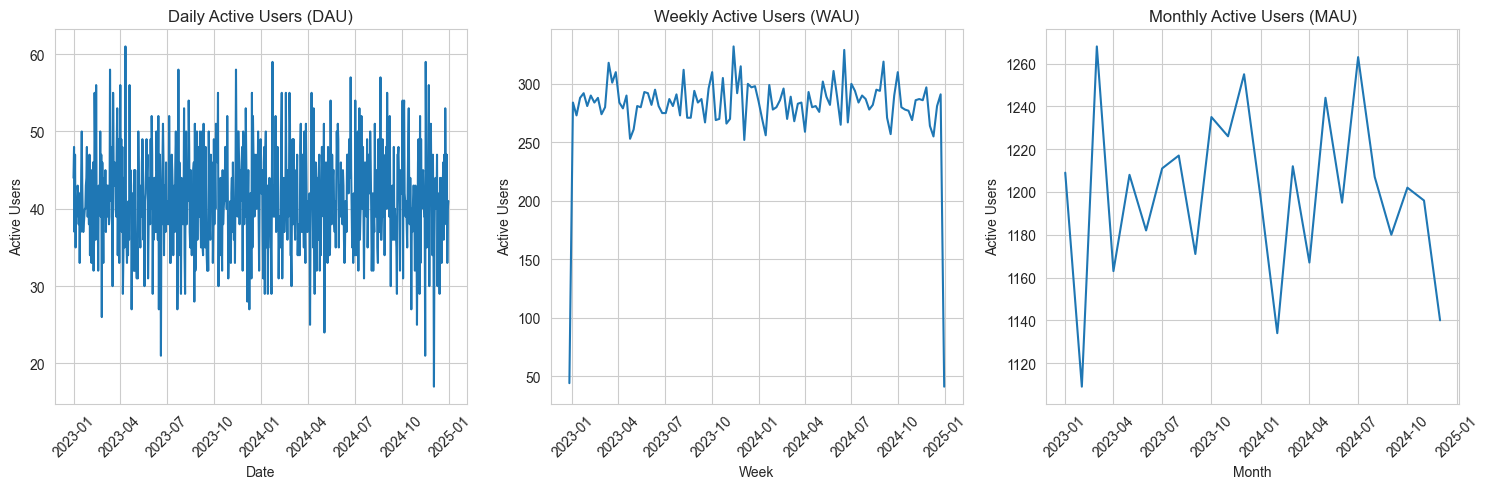

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dates are datetime objects for plotting
dau_df['event_date'] = pd.to_datetime(dau_df['event_date'])
wau_df['event_week'] = pd.to_datetime(wau_df['event_week'] + '-1', format='%Y-%W-%w') # Add '-1' to make it Monday of the week
mau_df['event_month'] = pd.to_datetime(mau_df['event_month'] + '-01')

# Set a style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plot DAU
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.lineplot(x='event_date', y='daily_active_users', data=dau_df)
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Active Users')
plt.xticks(rotation=45)

# Plot WAU
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.lineplot(x='event_week', y='weekly_active_users', data=wau_df)
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Active Users')
plt.xticks(rotation=45)

# Plot MAU
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.lineplot(x='event_month', y='monthly_active_users', data=mau_df)
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Active Users')
plt.xticks(rotation=45)

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show() # Display the plots

In [8]:
# --- 4. Calculate Average Session Duration ---
avg_session_duration_query = f"""
SELECT
    AVG(event_property_time_spent_seconds) AS average_session_duration_seconds,
    AVG(event_property_pages_visited) AS average_pages_visited_per_session
FROM
    `{events_table}`
WHERE
    event_name = 'session_end'
"""

print("\nFetching Average Session Duration and Pages Visited data...")
avg_session_df = client.query(avg_session_duration_query).to_dataframe()
print("Average Session Duration and Pages Visited data fetched successfully!")
avg_session_df # Display the results


Fetching Average Session Duration and Pages Visited data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Average Session Duration and Pages Visited data fetched successfully!


,average_session_duration_seconds,average_pages_visited_per_session
0,631.166802,5.502094


In [9]:
# --- 5. Calculate Overall Conversion Rate ---
overall_conversion_query = f"""
SELECT
    COUNT(DISTINCT user_id) AS total_users,
    COUNT(DISTINCT IF(event_name = 'purchase_completed', user_id, NULL)) AS purchasers,
    COUNT(DISTINCT IF(event_name = 'signup_completed', user_id, NULL)) AS signups
FROM
    `{events_table}`
WHERE
    event_name IN ('session_start', 'purchase_completed', 'signup_completed')
"""

print("\nFetching Overall Conversion Rate data...")
overall_conversion_df = client.query(overall_conversion_query).to_dataframe()
print("Overall Conversion Rate data fetched successfully!")
print(overall_conversion_df)

# Calculate conversion rates in Pandas
total_users = overall_conversion_df['total_users'].iloc[0]
purchasers = overall_conversion_df['purchasers'].iloc[0]
signups = overall_conversion_df['signups'].iloc[0]

purchase_conversion_rate = (purchasers / total_users) * 100 if total_users > 0 else 0
signup_conversion_rate = (signups / total_users) * 100 if total_users > 0 else 0

print(f"\nOverall Purchase Conversion Rate: {purchase_conversion_rate:.2f}%")
print(f"Overall Signup Conversion Rate: {signup_conversion_rate:.2f}%")

# --- 6. Calculate Conversion Rate by Device Type ---
device_conversion_query = f"""
SELECT
    event_property_device_type,
    COUNT(DISTINCT user_id) AS total_users_by_device,
    COUNT(DISTINCT IF(event_name = 'purchase_completed', user_id, NULL)) AS purchasers_by_device,
    COUNT(DISTINCT IF(event_name = 'signup_completed', user_id, NULL)) AS signups_by_device
FROM
    `{events_table}`
WHERE
    event_name IN ('session_start', 'purchase_completed', 'signup_completed')
    AND event_property_device_type IS NOT NULL
GROUP BY
    event_property_device_type
ORDER BY
    event_property_device_type
"""

print("\nFetching Conversion Rate by Device Type data...")
device_conversion_df = client.query(device_conversion_query).to_dataframe()
print("Conversion Rate by Device Type data fetched successfully!")
print(device_conversion_df)

# Calculate conversion rates by device in Pandas
device_conversion_df['purchase_conversion_rate'] = (device_conversion_df['purchasers_by_device'] / device_conversion_df['total_users_by_device']) * 100
device_conversion_df['signup_conversion_rate'] = (device_conversion_df['signups_by_device'] / device_conversion_df['total_users_by_device']) * 100

print("\nConversion Rates by Device Type:")
device_conversion_df[['event_property_device_type', 'purchase_conversion_rate', 'signup_conversion_rate']]


Fetching Overall Conversion Rate data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Overall Conversion Rate data fetched successfully!
   total_users  purchasers  signups
0        12851        1974     1464

Overall Purchase Conversion Rate: 15.36%
Overall Signup Conversion Rate: 11.39%

Fetching Conversion Rate by Device Type data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Conversion Rate by Device Type data fetched successfully!
  event_property_device_type  total_users_by_device  purchasers_by_device  \
0                    Desktop                   6567                   618   
1                     Mobile                  10341                  1220   
2                     Tablet                   2695                   209   

   signups_by_device  
0                464  
1                886  
2                165  

Conversion Rates by Device Type:


,event_property_device_type,purchase_conversion_rate,signup_conversion_rate
0,Desktop,9.41069,7.065631
1,Mobile,11.797698,8.567837
2,Tablet,7.755102,6.122449


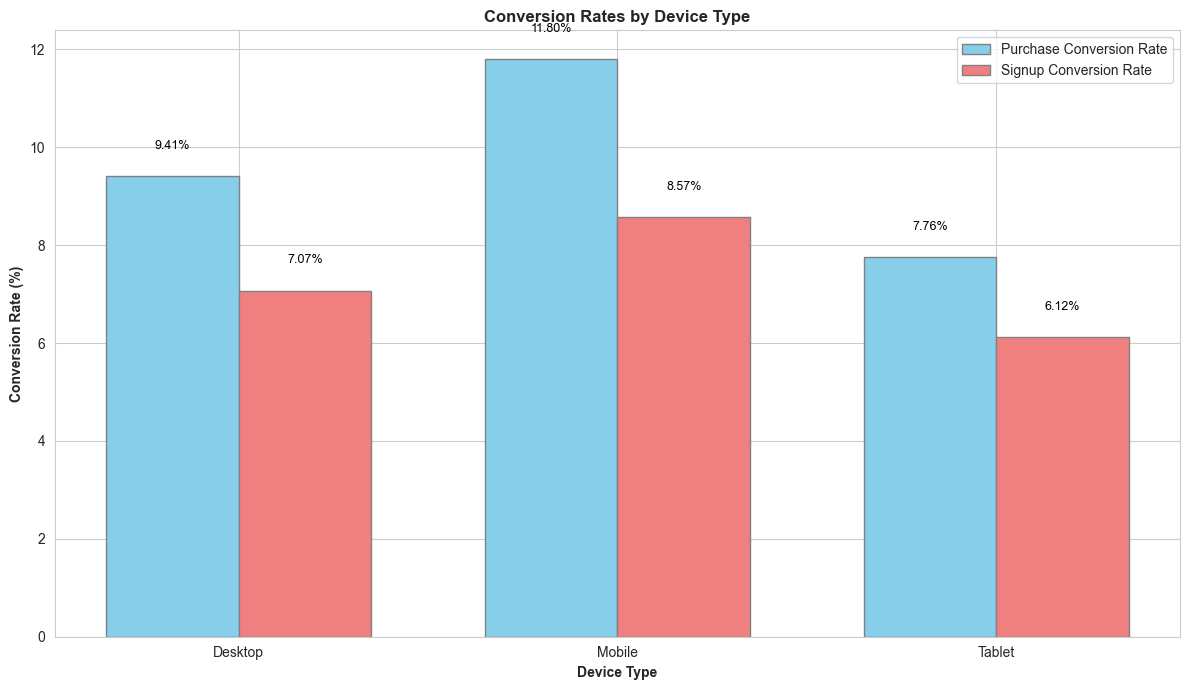

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for potential NaN handling

# Ensure event_property_device_type is set as index for plotting (if not already)
# If device_conversion_df already has it as index from previous runs, this won't hurt.
device_conversion_df_plot = device_conversion_df.set_index('event_property_device_type')

# Reset index to make 'event_property_device_type' a column for seaborn
# This is crucial for side-by-side bars
device_conversion_df_plot = device_conversion_df_plot.reset_index()


# Set a style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability

# Define bar width
bar_width = 0.35

# Set positions of bars on X axis
r1 = np.arange(len(device_conversion_df_plot['event_property_device_type']))
r2 = [x + bar_width for x in r1]

# Plotting the bars
# We only need one y-axis for percentages, as they are comparable.
# Using twinx() for different scales is generally better. Here, they are both percentages.
# If values are vastly different, twinx is useful, but here, one y-axis is cleaner.

plt.bar(r1, device_conversion_df_plot['purchase_conversion_rate'], color='skyblue', width=bar_width, edgecolor='grey', label='Purchase Conversion Rate')
plt.bar(r2, device_conversion_df_plot['signup_conversion_rate'], color='lightcoral', width=bar_width, edgecolor='grey', label='Signup Conversion Rate')

# Add x-axis labels
plt.xlabel('Device Type', fontweight='bold')
plt.ylabel('Conversion Rate (%)', fontweight='bold')
plt.title('Conversion Rates by Device Type', fontweight='bold')

# Add device types to the x-axis
plt.xticks([r + bar_width / 2 for r in range(len(device_conversion_df_plot['event_property_device_type']))], device_conversion_df_plot['event_property_device_type'])

# Add values on top of the bars
for i, val in enumerate(device_conversion_df_plot['purchase_conversion_rate']):
    plt.text(r1[i], val + 0.5, f'{val:.2f}%', ha='center', va='bottom', fontsize=9, color='black')

for i, val in enumerate(device_conversion_df_plot['signup_conversion_rate']):
    plt.text(r2[i], val + 0.5, f'{val:.2f}%', ha='center', va='bottom', fontsize=9, color='black')

plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# --- 7. Funnel Analysis ---
funnel_query = f"""
SELECT
    COUNT(DISTINCT CASE WHEN event_name = 'session_start' THEN user_id END) AS step_1_session_start,
    COUNT(DISTINCT CASE WHEN event_name = 'signed_in_event' THEN user_id END) AS step_2_signed_in,
    COUNT(DISTINCT CASE WHEN event_name = 'coupon_applied' THEN user_id END) AS step_3_coupon_applied,
    COUNT(DISTINCT CASE WHEN event_name = 'purchase_completed' THEN user_id END) AS step_4_purchase_completed
FROM
    `{events_table}`
WHERE
    event_name IN ('session_start', 'signed_in_event', 'coupon_applied', 'purchase_completed')
"""

print("\nFetching Funnel Data...")
funnel_df = client.query(funnel_query).to_dataframe()
print("Funnel data fetched successfully!")
print(funnel_df)

# Convert to a format suitable for plotting (e.g., a Series)
funnel_steps = {
    'Session Start': funnel_df['step_1_session_start'].iloc[0],
    'Signed In': funnel_df['step_2_signed_in'].iloc[0],
    'Coupon Applied': funnel_df['step_3_coupon_applied'].iloc[0],
    'Purchase Completed': funnel_df['step_4_purchase_completed'].iloc[0]
}

# Create a DataFrame for plotting
funnel_plot_df = pd.DataFrame(list(funnel_steps.items()), columns=['Step', 'Users'])
print("\nFunnel Plotting Data:")
funnel_plot_df


Fetching Funnel Data...


e:\Product Analytics Project\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Funnel data fetched successfully!
   step_1_session_start  step_2_signed_in  step_3_coupon_applied  \
0                 12851             10445                    844   

   step_4_purchase_completed  
0                       1974  

Funnel Plotting Data:


,Step,Users
0,Session Start,12851
1,Signed In,10445
2,Coupon Applied,844
3,Purchase Completed,1974



Funnel Data with Percentages and Drop-offs:
                 Step  Users  Percentage   Drop-off
0       Session Start  12851  100.000000   0.000000
1           Signed In  10445   81.277722 -18.722278
2      Coupon Applied    844    6.567582 -74.710139
3  Purchase Completed   1974   15.360672   8.793090


C:\Users\User\AppData\Local\Temp\ipykernel_10032\1239202481.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Step', y='Users', data=funnel_plot_df, palette='viridis')


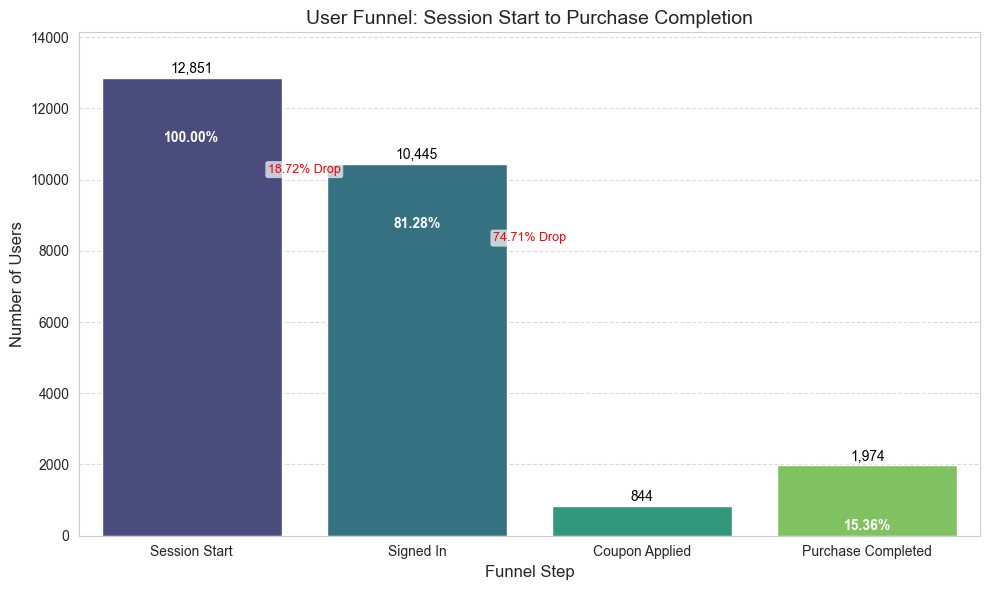

In [12]:
# --- Visualize Funnel ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from previous step's funnel_plot_df
# funnel_plot_df should look like:
#                Step  Users
# 0     Session Start  12851
# 1         Signed In  10445
# 2    Coupon Applied    844
# 3  Purchase Completed   1974

# Calculate drop-off percentage at each step
# Start with 100% at the first step
funnel_plot_df['Percentage'] = (funnel_plot_df['Users'] / funnel_plot_df['Users'].iloc[0]) * 100
funnel_plot_df['Drop-off'] = funnel_plot_df['Percentage'].diff().fillna(0) # Calculate drop-off from previous step

print("\nFunnel Data with Percentages and Drop-offs:")
print(funnel_plot_df)

# Create the funnel visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Step', y='Users', data=funnel_plot_df, palette='viridis')

# Add annotations for users and percentages
for index, row in funnel_plot_df.iterrows():
    plt.text(index, row['Users'] + 50, f"{row['Users']:,}", color='black', ha="center", va='bottom', fontsize=10)
    plt.text(index, row['Users'] - 1500, f"{row['Percentage']:.2f}%", color='white', ha="center", va='top', fontsize=10, fontweight='bold')

# Add drop-off percentage labels between bars (approximate placement)
for i in range(1, len(funnel_plot_df)):
    drop_off_percentage = funnel_plot_df['Drop-off'].iloc[i]
    if drop_off_percentage < 0: # Only show negative drop-offs
        plt.text(i - 0.5, funnel_plot_df['Users'].iloc[i-1] * 0.8, f"{-drop_off_percentage:.2f}% Drop",
                 color='red', ha='center', va='center', fontsize=9, rotation=0,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

plt.title('User Funnel: Session Start to Purchase Completion', fontsize=14)
plt.xlabel('Funnel Step', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.ylim(0, funnel_plot_df['Users'].iloc[0] * 1.1) # Extend y-axis slightly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()